# 00. 라이브러리 임포트

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# plt.rcParams['font.family'] = 'Malgun Gothic'    # 윈도우
plt.rcParams['font.family'] = 'AppleGothic'        # 맥
# plt.rcParams['font.family'] = 'NanumGothic'      # 리눅스
plt.rcParams['axes.unicode_minus'] = False         # 마이너스(-) 깨짐 현상 방지

# 01. 데이터 로드

In [7]:
survey_2024 = pd.read_excel("../data/raw/2024년 외래관광객조사_원자료.xlsx")

# 02. 분석변수 선정

## 2024년 외래관광객조사


### 여행 특성 관련 변수

- M일HAP_61 : 총 체재기간_61일 이상 결측

- TYP : 여행 형태
  - 1: 개별여행
  - 2: AIR-TEL
  - 3: 단체여행

- D_MOK : 방한목적별
  - 1: 여가/위락/휴식
  - 2: 친구/친지 방문
  - 3: 사업 또는 전문활동
  - 4: 교육
  - 5: 기타

- D_NUM : 방한횟수별
  - 1: 1회
  - 2: 2회
  - 3: 3회
  - 4: 4회이상

- MVIT : 한국 방문횟수(평균)

- D_MON : 월별
  - 1: 1월
  - 2: 2월
  - 3: 3월
  - 4: 4월
  - 5: 5월
  - 6: 6월
  - 7: 7월
  - 8: 8월
  - 9: 9월
  - 10: 10월
  - 11: 11월
  - 12: 12월

- D_BUN : 분기별
  - 1: 1분기
  - 2: 2분기
  - 3: 3분기
  - 4: 4분기

- Q7A : 동반자 유무
  - 1.00 : 동반자 없음
  - 2.00 : 동반자 있음

- Q7a_dk ~ Q7a8 : 동반자 유형
  - 1: 혼자 방문
  - 2: 배우자/파트너
  - 3: 부모님
  - 4: 자녀
  - 5: 그 외 가족/친지
  - 6: 친구
  - 7: 직장 동료
  - 8: 기타

### 활동 및 경험 관련 변수

- Q8a01 ~ Q8a20 : 참여한 활동
  - 1: 식도락(음식/미식) 관광
  - 2: 쇼핑
  - 3: 자연경관 감상
  - 4: 휴양/휴식(웰니스)
  - 5: 고궁/역사 유적지 방문
  - 6: 전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)
  - 7: 박물관, 전시관 관람
  - 8: K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문
  - 9: 연극, 뮤지컬, 발레 등 공연 관람
  - 10: 지역 축제 참여
  - 11: 유흥(나이트라이프 활동 및 카지노)
  - 12: 오락(놀이공원 및 테마파크 방문 등)
  - 13: 뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)
  - 14: 치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)
  - 15: 스포츠/레포츠 관람 (야구, 축구, 농구 등)
  - 16: 스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등)
  - 17: 국제회의(컨벤션, 국제회의, 전시 등)
  - 18: 비즈니스 전문활동(업무회의, 산업시설 시찰 등)
  - 19: 연수, 교육, 연구
  - 20: 기타

- Q8_1a1 ~ Q8_1a3 : 만족한 활동
  - 1: 식도락(음식/미식) 관광
  - 2: 쇼핑
  - 3: 자연경관 감상
  - 4: 휴양/휴식(웰니스)
  - 5: 고궁/역사 유적지 방문
  - 6: 전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)
  - 7: 박물관, 전시관 관람
  - 8: K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문
  - 9: 연극, 뮤지컬, 발레 등 공연 관람
  - 10: 지역 축제 참여
  - 11: 유흥(나이트라이프 활동 및 카지노)
  - 12: 오락(놀이공원 및 테마파크 방문 등)
  - 13: 뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)
  - 14: 치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)
  - 15: 스포츠/레포츠 관람 (야구, 축구, 농구 등)
  - 16: 스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등)
  - 17: 국제회의(컨벤션, 국제회의, 전시 등)
  - 18: 비즈니스 전문활동(업무회의, 산업시설 시찰 등)
  - 19: 연수, 교육, 연구
  - 20: 기타

- Q9_2a01 ~ Q9_2a17 : 방문지역
  - 1: 서울
  - 2: 경기
  - 3: 인천
  - 4: 강원
  - 5: 대전
  - 6: 충북
  - 7: 충남
  - 8: 세종
  - 9: 경북
  - 10: 경남
  - 11: 대구
  - 12: 울산
  - 13: 부산
  - 14: 광주
  - 15: 전북
  - 16: 전남
  - 17: 제주

- Q9_5A1 ~ Q9_5A9 : 주요 이용 숙박시설
  - 1: 호텔
  - 2: 모텔/여관
  - 3: 콘도미니엄/리조트
  - 4: 게스트하우스/호스텔
  - 5: 민박/펜션
  - 6: 학교/회사 기숙사, 연수원 등
  - 7: 친척 또는 친구 집
  - 8: 기타 
  - 9: 숙박하지 않음

### 소비 구조 관련 변수

- 총액1인TOT2 : 1인 지출경비(상하위 1% 대체)

- MDAY전체TOT_RAW61 : 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)

- Q10_2a01 ~ Q10_2a13 : 쇼핑 항목
  - 1: 향수, 화장품
  - 2: 식료품(김치, 김, 과자 등)
  - 3: 의류
  - 4: 신발류
  - 5: 가방류
  - 6: 보석/악세서리
  - 7: 인삼, 한약재
  - 8: 주류
  - 9: 담배
  - 10: 전통 민예품, 칠기, 목각제품
  - 11: 한류 스타 관련상품(앨범, 포토카드, 기타 굿즈 등)
  - 12: 전자제품
  - 13: 기타

- Q10_3a1 ~ Q10_3a3 : 쇼핑 장소
  - 1: 공항 면세점
  - 2: 시내 면세점
  - 3: 로드샵
  - 4: 전통시장
  - 5: 백화점
  - 6: 대형 쇼핑몰
  - 7: 대형마트
  - 8: 기타

### 태도･만족도 관련 변수

- Q11 : 전반적 만족도
  - 1: 매우 불만족
  - 2: 대체로 불만족
  - 3: 보통
  - 4: 대체로 만족
  - 5: 매우 만족

- Q13 : 재방문 의사
  - 1: 전혀 그렇지 않다
  - 2: 별로 그렇지 않다
  - 3: 보통
  - 4: 대체로 그렇다
  - 5: 매우 그렇다

- Q14 : 타인 추천 의향
  - 1: 전혀 그렇지 않다
  - 2: 별로 그렇지 않다
  - 3: 보통
  - 4: 대체로 그렇다
  - 5: 매우 그렇다

### 인구통계 관련 변수

- D_SEX : 성별
  - 1: 남성
  - 2: 여성

- D_AGE : 연령별
  - 1: 15-19세
  - 2: 20대
  - 3: 30대
  - 4: 40대
  - 5: 50대
  - 6: 60대 이상


In [8]:
analysis_vars = [
    # 여행 특성 관련 변수
    'M일HAP_61',     # 총 체재기간_61일 이상 결측
    'TYP',           # 여행형태
    'D_MOK',         # 방한목적별  
    'D_NUM',         # 방한횟수별
    'MVIT',          # 한국 방문횟수(평균)
    'D_MON',         # 월별
    'D_BUN',         # 분기별
    'Q7A',           # 동반자 유무
    # 동반자 유형
    'Q7a_dk', 'Q7a2', 'Q7a3', 'Q7a4', 'Q7a5', 'Q7a6', 'Q7a7', 'Q7a8',

    # 활동 및 경험 관련 변수
    # 참여한 활동
    'Q8a01', 'Q8a02', 'Q8a03', 'Q8a04', 'Q8a05', 'Q8a06', 'Q8a07', 'Q8a08', 'Q8a09', 'Q8a10',
    'Q8a11', 'Q8a12', 'Q8a13', 'Q8a14', 'Q8a15', 'Q8a16', 'Q8a17', 'Q8a18', 'Q8a19', 'Q8a20',
    # 만족한 활동
    'Q8_1a1', 'Q8_1a2', 'Q8_1a3',
    # 방문 지역
    'Q9_2a01', 'Q9_2a02', 'Q9_2a03', 'Q9_2a04', 'Q9_2a05',
    'Q9_2a06', 'Q9_2a07', 'Q9_2a08', 'Q9_2a09', 'Q9_2a10',
    'Q9_2a11', 'Q9_2a12', 'Q9_2a13', 'Q9_2a14', 'Q9_2a15', 'Q9_2a16', 'Q9_2a17',
    # 주요 이용 숙박시설
    'Q9_5A1', 'Q9_5A2', 'Q9_5A3', 'Q9_5A4', 'Q9_5A5',
    'Q9_5A6', 'Q9_5A7', 'Q9_5A8', 'Q9_5A9',

    # 소비 구조 관련 변수
    '총액1인TOT2',              # 1인 지출경비(상하위 1% 대체)
    'MDAY전체TOT_RAW61',        # 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)
    # 쇼핑 항목
    'Q10_2a01', 'Q10_2a02', 'Q10_2a03', 'Q10_2a04', 'Q10_2a05',
    'Q10_2a06', 'Q10_2a07', 'Q10_2a08', 'Q10_2a09', 'Q10_2a10',
    'Q10_2a11', 'Q10_2a12', 'Q10_2a13',
    # 쇼핑 장소
    'Q10_3a1', 'Q10_3a2', 'Q10_3a3',

    # 태도/만족도 관련 변수
    'Q11',           # 전반적 만족도
    'Q13',           # 재방문 의사
    'Q14',           # 타인 추천 의향

    # 인구통계 관련 변수
    'D_SEX',         # 성별
    'D_AGE'          # 연령별
]

In [9]:
df = survey_2024[analysis_vars]

# 03. 더미변수화

## 03-1. 순서가 없는 범주형 응답 더미변수화

### 여행형태

In [10]:
travel_type_dummies = pd.get_dummies(df['TYP'], prefix='TYP', prefix_sep='').astype(int)
df = pd.concat([df.drop(columns=['TYP']), travel_type_dummies], axis=1)

### 방한목적

In [11]:
purpose_dummies = pd.get_dummies(df['D_MOK'], prefix='D_MOK', prefix_sep='').astype(int)
df = pd.concat([df.drop(columns=['D_MOK']), purpose_dummies], axis=1)

## 03-2. 다중 응답(3개) 로 구성된 질문을 응답별로 0과 1로 이진화

### 만족한 활동

In [12]:
satisfaction_cols = ['Q8_1a1', 'Q8_1a2', 'Q8_1a3']
satisfaction_stacked = df[satisfaction_cols].stack().dropna().astype(int)
satisfaction_dummies = (
    pd.get_dummies(satisfaction_stacked, prefix="Q8_1a", prefix_sep="")
      .groupby(level=0).max()
      .reindex(df.index, fill_value=0)
      .astype(int)
)
df = pd.concat([df.drop(columns=satisfaction_cols), satisfaction_dummies], axis=1)

### 쇼핑장소

In [13]:
shopping_place_cols = ['Q10_3a1', 'Q10_3a2', 'Q10_3a3']
shopping_stacked = df[shopping_place_cols].stack().dropna().astype(int)
shopping_dummies = (
    pd.get_dummies(shopping_stacked, prefix="Q10_3a", prefix_sep="")
      .groupby(level=0).max()
      .reindex(df.index, fill_value=0)
      .astype(int)
)
df = pd.concat([df.drop(columns=shopping_place_cols), shopping_dummies], axis=1)

## 03-3. 이미 이진분류로 되어있는 데이터의 구조를 0과 1의 형태로 수정

### 함수 정의

In [14]:
def convert_to_binary(df, column_patterns):
    """결측치를 0으로, 나머지를 1로 변환하는 함수"""
    for pattern in column_patterns:
        cols = [col for col in df.columns if pattern in col]
        for col in cols:
            df[col] = df[col].notna().astype(int)
    return df

### 이진형 변수들 일괄 처리

In [15]:
# 이진형 변수들 일괄 처리
binary_patterns = ['Q7a', 'Q8a', 'Q9_2a', 'Q9_5A', 'Q10_2a']    # 동반자유형, 참여한활동, 방문지역, 주요이용숙박시설, 쇼핑항목
df = convert_to_binary(df, binary_patterns)

## 03-4. 1,2로 구성된 컬럼 0,1의 binary로 변경

In [16]:
df[['Q7A','D_SEX']] = df[['Q7A','D_SEX']] - 1   # 동반자유무, 성별

# 04. 결측치제거

In [17]:
print(f"결측치 제거 전 관측치 수: {len(df)}")
final_df = df.dropna().reset_index(drop=True)
print(f"결측치 제거 후 관측치 수: {len(final_df)}")

결측치 제거 전 관측치 수: 16216
결측치 제거 후 관측치 수: 15797


# 05. 기초통계량 확인

## 05-1. 범주형 변수

### 05-1-1. 기초통계량

In [18]:
# 연속형 변수 제외
exclude_cols = ["MDAY전체TOT_RAW61", "M일HAP_61", "MVIT", "총액1인TOT2"]
categorical_cols = [c for c in final_df.columns if c not in exclude_cols]

# 1) 이진형 변수 찾기 (0/1만 있는 변수)
binary_cols = [c for c in categorical_cols 
               if set(final_df[c].dropna().unique()).issubset({0,1})]

# 2) 순서형 변수 (나머지)
ordinal_cols = [c for c in categorical_cols if c not in binary_cols]

# 3) 이진형 변수 요약표
binary_summary = pd.DataFrame({
    "Count": final_df[binary_cols].count(),
    "mean(=1의 비율)": final_df[binary_cols].mean(),
    "Std": final_df[binary_cols].std(),
    "Min": final_df[binary_cols].min(),
    "Max": final_df[binary_cols].max()
})

# 4) 순서형 변수 요약표
ordinal_summary = final_df[ordinal_cols].describe().T

# === 출력 ===
print("=== 이진형 변수 요약 ===")
display(binary_summary)

print("\n=== 순서형 변수 요약 ===")
display(ordinal_summary)

=== 이진형 변수 요약 ===


,Count,mean(=1의 비율),Std,Min,Max
Q7A,15797,0.708299,0.454560,0,1
Q7a_dk,15797,0.291701,0.454560,0,1
Q7a2,15797,0.208394,0.406173,0,1
Q7a3,15797,0.071596,0.257826,0,1
Q7a4,15797,0.094955,0.293162,0,1
...,...,...,...,...,...
Q10_3a4,15797,0.254289,0.435474,0,1
Q10_3a5,15797,0.345888,0.475672,0,1
Q10_3a6,15797,0.367222,0.482063,0,1
Q10_3a7,15797,0.203456,0.402582,0,1



=== 순서형 변수 요약 ===


,count,mean,std,min,25%,50%,75%,max
D_NUM,15797.0,2.069317,1.212357,1.0,1.0,2.0,3.0,4.0
D_MON,15797.0,6.506552,3.440543,1.0,4.0,7.0,10.0,12.0
D_BUN,15797.0,2.505096,1.118822,1.0,2.0,3.0,4.0,4.0
Q11,15797.0,4.586820,0.571667,1.0,4.0,5.0,5.0,5.0
Q13,15797.0,4.524087,0.695738,1.0,4.0,5.0,5.0,5.0
Q14,15797.0,4.627018,0.560947,1.0,4.0,5.0,5.0,5.0
D_AGE,15797.0,3.306197,1.260557,1.0,2.0,3.0,4.0,6.0


## 05-2. 연속형변수

### 05-2-1. 기초통계량

=== 연속형 변수 기술통계량 ===


,Count,Mean,Std,Min,25%,Median,75%,Max,Skew,Kurtosis
MDAY전체TOT_RAW61,15797.0,329.053,264.304,22.00,181.901,258.897,380.52,1687.50,2.756,9.603
M일HAP_61,15797.0,7.637,6.661,1.00,4.000,6.000,8.00,60.00,3.417,15.450
MVIT,15797.0,3.305,6.331,1.00,1.000,2.000,3.00,99.00,8.531,101.208
총액1인TOT2,15797.0,2034.525,1589.738,335.52,1010.494,1558.200,2500.00,9961.77,2.345,7.102


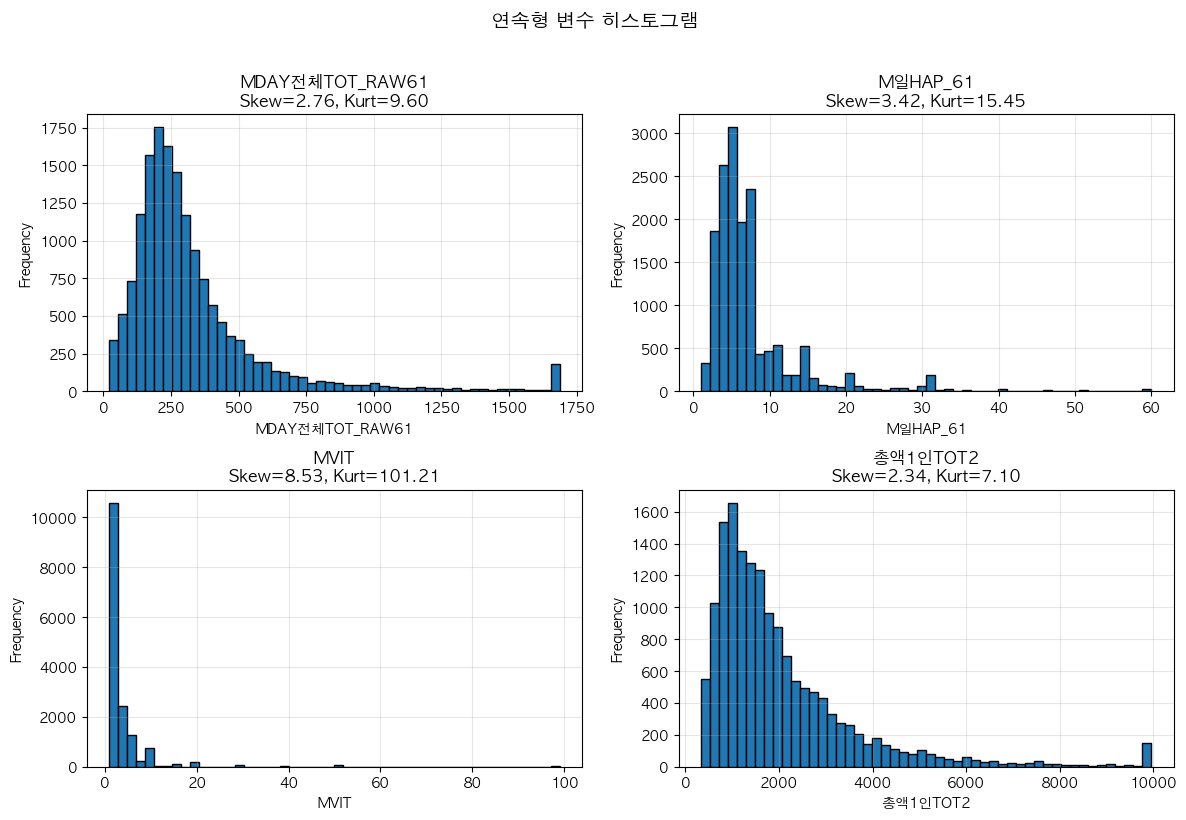

In [19]:
# 분석 대상 컬럼
continuous_vars = ["MDAY전체TOT_RAW61", "M일HAP_61", "MVIT", "총액1인TOT2"]

def compute_descriptive_stats(series):
    """기술통계량 계산 함수"""
    clean_data = series.dropna()
    return pd.Series({
        "Count": len(clean_data),
        "Mean": clean_data.mean(),
        "Std": clean_data.std(),
        "Min": clean_data.min(),
        "25%": clean_data.quantile(0.25),
        "Median": clean_data.median(),
        "75%": clean_data.quantile(0.75),
        "Max": clean_data.max(),
        "Skew": skew(clean_data),
        "Kurtosis": kurtosis(clean_data)
    })

# 연속형 변수 기술통계량
continuous_stats = pd.DataFrame({
    var: compute_descriptive_stats(final_df[var]) 
    for var in continuous_vars
}).T

print("=== 연속형 변수 기술통계량 ===")
display(continuous_stats.round(3))

# 히스토그램 시각화
def plot_histograms_2x2(df, columns, bins=50):
    """2x2 서브플롯에 히스토그램 그리기"""
    n = len(columns)
    rows, cols_grid = 2, 2
    fig, axes = plt.subplots(rows, cols_grid, figsize=(12, 8))
    axes = axes.ravel()

    for i, col in enumerate(columns):
        ax = axes[i]
        data = df[col].dropna()

        ax.hist(data, bins=bins, edgecolor="black")
        sk = skew(data)
        kt = kurtosis(data)
        ax.set_title(f"{col}\nSkew={sk:.2f}, Kurt={kt:.2f}")
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
        ax.grid(alpha=0.3)

    for j in range(i+1, rows*cols_grid):
        axes[j].axis("off")

    plt.suptitle("연속형 변수 히스토그램", y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()

plot_histograms_2x2(final_df, continuous_vars, bins=50)

### 05-2-2. 이상치 확인

In [20]:
def detect_outliers(series, method='iqr'):
    """IQR 방법으로 이상치 탐지"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# 각 변수별 이상치 개수 확인
for var in continuous_vars:
    n_outliers, lower, upper = detect_outliers(final_df[var])
    print(f"{var}: 이상치 {n_outliers}개 (하한: {lower:.2f}, 상한: {upper:.2f})")

MDAY전체TOT_RAW61: 이상치 1165개 (하한: -116.03, 상한: 678.45)
M일HAP_61: 이상치 1522개 (하한: -2.00, 상한: 14.00)
MVIT: 이상치 1504개 (하한: -2.00, 상한: 6.00)
총액1인TOT2: 이상치 965개 (하한: -1223.76, 상한: 4734.26)


### 05-2-3. 상위 1% 윈저라이징


=== [Before] 윈저라이징 전 기초통계량 ===


,N,mean,median,std,min,p25,p50,p75,p95,p99,max,skew,kurtosis
MDAY전체TOT_RAW61,15797.0,329.053,258.897,264.304,22.00,181.901,258.897,380.52,828.910,1687.50,1687.50,2.756,9.603
M일HAP_61,15797.0,7.637,6.000,6.661,1.00,4.000,6.000,8.00,21.000,35.00,60.00,3.417,15.450
MVIT,15797.0,3.305,2.000,6.331,1.00,1.000,2.000,3.00,10.000,30.00,99.00,8.531,101.208
총액1인TOT2,15797.0,2034.525,1558.200,1589.738,335.52,1010.494,1558.200,2500.00,5095.068,9413.94,9961.77,2.345,7.102



=== [After] 윈저라이징 후 기초통계량 ===


,N,mean,median,std,min,p25,p50,p75,p95,p99,max,skew,kurtosis
MDAY전체TOT_RAW61,15797.0,329.053,258.897,264.304,22.00,181.901,258.897,380.52,828.910,1687.500,1687.50,2.756,9.603
M일HAP_61,15797.0,7.522,6.000,6.012,1.00,4.000,6.000,8.00,21.000,35.000,35.00,2.620,7.448
MVIT,15797.0,3.087,2.000,4.271,1.00,1.000,2.000,3.00,10.000,30.000,30.00,3.977,19.005
총액1인TOT2,15797.0,2029.379,1558.200,1564.774,335.52,1010.494,1558.200,2500.00,5095.068,9413.518,9413.94,2.233,6.254


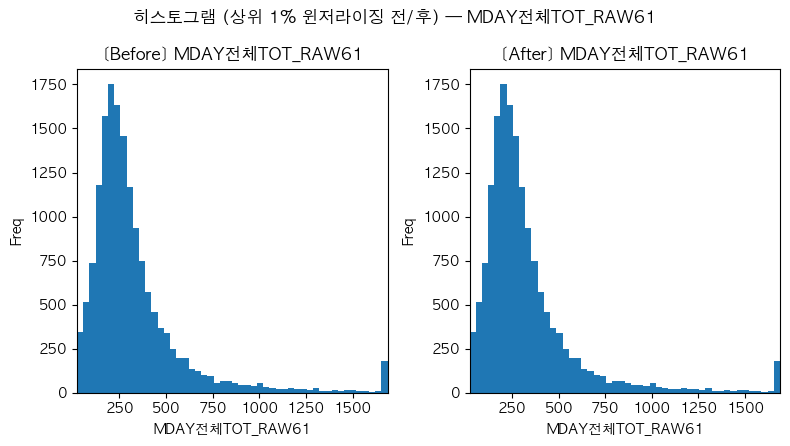

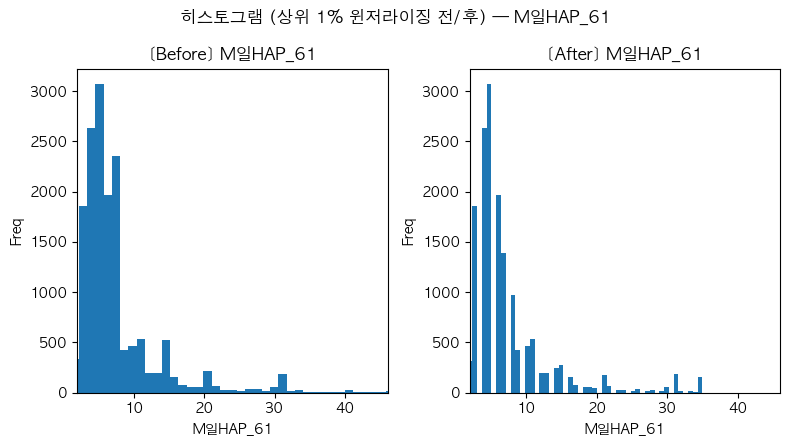

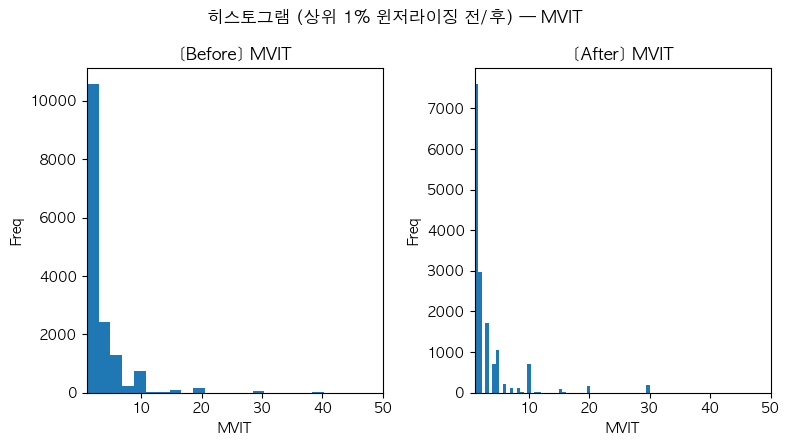

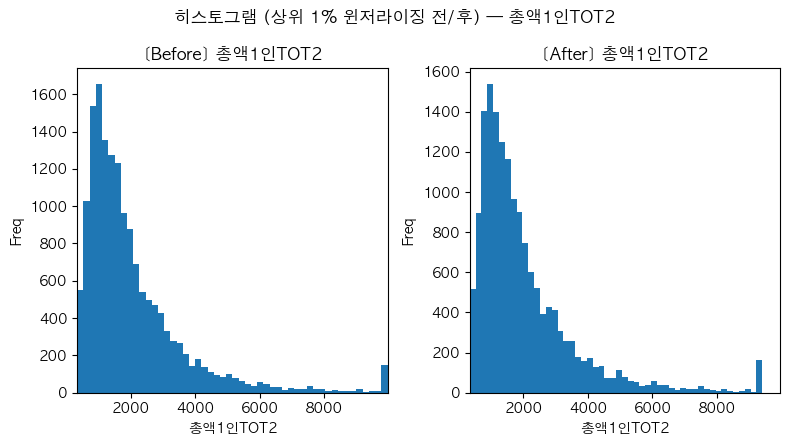

In [21]:
# 원본 복사
final_df_copy = final_df.copy()

# 상위 1% 윈저라이징 적용
def winsorize_upper(s: pd.Series, upper_q=0.99):
    q_high = s.quantile(upper_q)
    return s.mask(s > q_high, q_high)  # 상위 컷 초과값만 대체

final_df_winsor = final_df_copy.copy()
cutoffs = {}
for c in continuous_vars:
    q99 = final_df_copy[c].quantile(0.99)
    cutoffs[c] = q99
    final_df_winsor[c] = winsorize_upper(final_df_copy[c], upper_q=0.99)

# 요약통계 & 왜도/첨도
def summary_stats(s: pd.Series):
    s = s.dropna()
    return pd.Series({
        "N": len(s),
        "mean": s.mean(),
        "median": s.median(),
        "std": s.std(),
        "min": s.min(),
        "p25": s.quantile(0.25),
        "p50": s.quantile(0.50),
        "p75": s.quantile(0.75),
        "p95": s.quantile(0.95),
        "p99": s.quantile(0.99),
        "max": s.max(),
        "skew": skew(s),
        "kurtosis": kurtosis(s)
    })

before_table = pd.DataFrame({c: summary_stats(final_df_copy[c]) for c in continuous_vars}).T
after_table  = pd.DataFrame({c: summary_stats(final_df_winsor[c]) for c in continuous_vars}).T

print("\n=== [Before] 윈저라이징 전 기초통계량 ===")
display(before_table.round(3))

print("\n=== [After] 윈저라이징 후 기초통계량 ===")
display(after_table.round(3))

# 히스토그램 비교 (전/후)
for c in continuous_vars:
    x = final_df_copy[c].dropna()
    x_w = final_df_winsor[c].dropna()

    xmin = np.nanquantile(x, 0.005)
    xmax = np.nanquantile(x, 0.995)
    if xmin == xmax:
        xmin, xmax = x.min(), x.max()

    plt.figure(figsize=(8, 4.5))

    # 윈저라이징 전
    plt.subplot(1, 2, 1)
    plt.hist(x, bins=50)
    plt.title(f"[Before] {c}")
    plt.xlabel(c); plt.ylabel("Freq")
    plt.xlim(xmin, xmax)

    # 윈저라이징 후
    plt.subplot(1, 2, 2)
    plt.hist(x_w, bins=50)
    plt.title(f"[After] {c}")
    plt.xlabel(c); plt.ylabel("Freq")
    plt.xlim(xmin, xmax)

    plt.suptitle(f"히스토그램 (상위 1% 윈저라이징 전/후) — {c}")
    plt.tight_layout()
    plt.show()

# 07. 최종 데이터 저장

In [22]:
# 윈저라이징 적용 전 데이터
final_df.to_csv("../data/processed/survey_2024.csv",index=False)
final_df.to_excel("../data/processed/survey_2024.xlsx",index=False)

# 윈저라이징 적용 후 데이터
final_df_winsor.to_csv("../data/processed/survey_2024_winsor.csv",index=False)
final_df_winsor.to_excel("../data/processed/survey_2024_winsor.xlsx",index=False)